<a href="https://colab.research.google.com/github/Shrikant-stack/Data_Analytics_Learning/blob/main/Sample_retail_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
data = uploaded

Saving sample_retail_data.xlsx to sample_retail_data (1).xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('sample_retail_data.xlsx')

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Product Name,Category,Quantity Sold,Unit Price,Total Price,Payment Method,Region,Salesperson
0,T001,2024-01-01,C1051,Laptop,Apparel,2,810.04,1620.08,PayPal,West,Jane Smith
1,T002,2024-01-02,C1092,T-Shirt,Apparel,1,637.07,637.07,PayPal,North,Jane Smith
2,T003,2024-01-03,C1014,Laptop,Home & Kitchen,4,872.75,3491.00,Cash,East,Emily Davis
3,T004,2024-01-04,C1071,T-Shirt,Home & Kitchen,4,805.64,3222.56,PayPal,West,John Doe
4,T005,2024-01-05,C1060,Laptop,Apparel,4,194.70,778.80,Credit Card,North,Emily Davis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  100 non-null    object        
 1   Date            100 non-null    datetime64[ns]
 2   Customer ID     100 non-null    object        
 3   Product Name    100 non-null    object        
 4   Category        100 non-null    object        
 5   Quantity Sold   100 non-null    int64         
 6   Unit Price      100 non-null    float64       
 7   Total Price     100 non-null    float64       
 8   Payment Method  100 non-null    object        
 9   Region          100 non-null    object        
 10  Salesperson     100 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 8.7+ KB


In [ ]:
df.describe()

,Date,Quantity Sold,Unit Price,Total Price
count,100,100.000000,100.000000,100.000000
mean,2024-02-19 12:00:00,2.520000,500.134800,1300.370100
min,2024-01-01 00:00:00,1.000000,15.010000,16.880000
25%,2024-01-25 18:00:00,1.000000,246.692500,487.870000
50%,2024-02-19 12:00:00,3.000000,520.285000,1037.850000
75%,2024-03-15 06:00:00,3.000000,739.197500,2011.050000
max,2024-04-09 00:00:00,4.000000,985.790000,3636.720000
std,NaN,1.132442,292.786081,1002.383315


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Product Name,0
Category,0
Quantity Sold,0
Unit Price,0
Total Price,0
Payment Method,0
Region,0


In [ ]:
import numpy as np
sum_revenue = np.sum(df['Total Price'])
print(sum_revenue)

130037.01000000001


In [ ]:
total_quantity = np.sum(df['Quantity Sold'])
print("Total Quantity: ",total_quantity)

Total Quantity:  252


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Product Name', 'Category',
       'Quantity Sold', 'Unit Price', 'Total Price', 'Payment Method',
       'Region', 'Salesperson'],
      dtype='object')

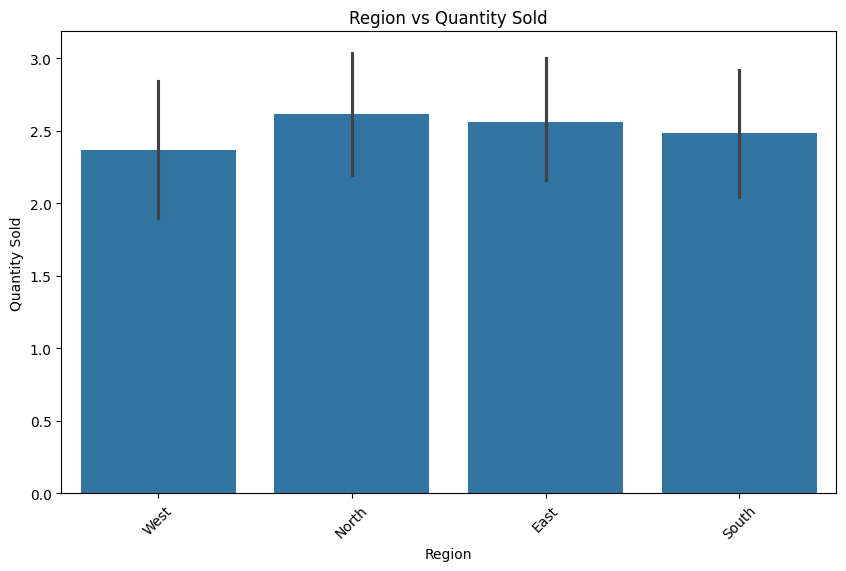

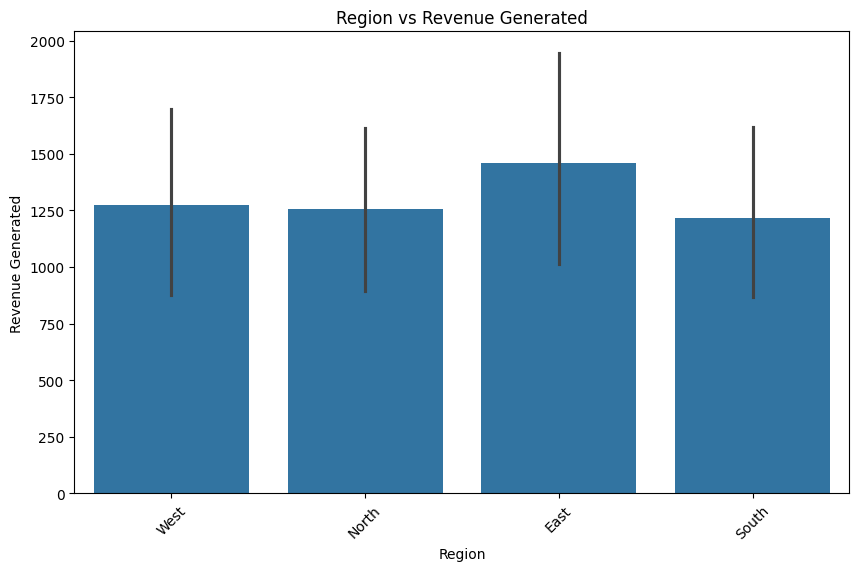

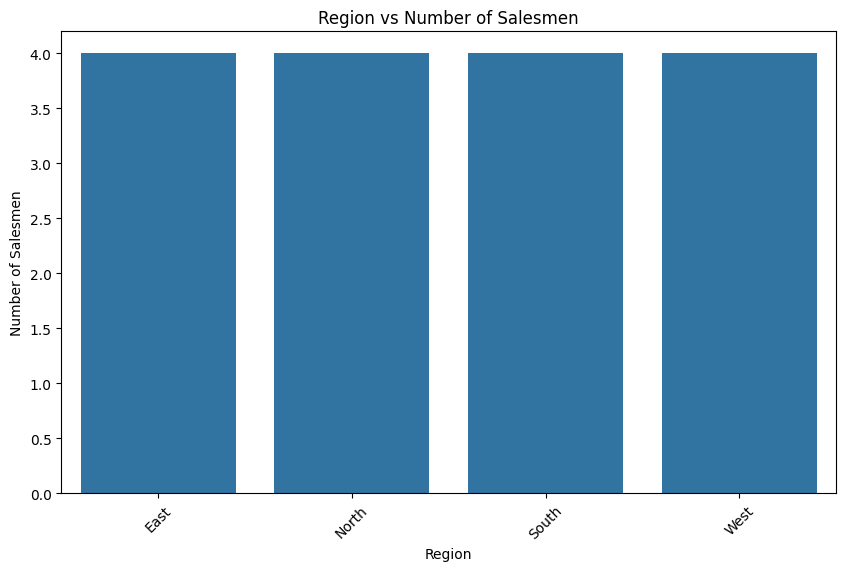

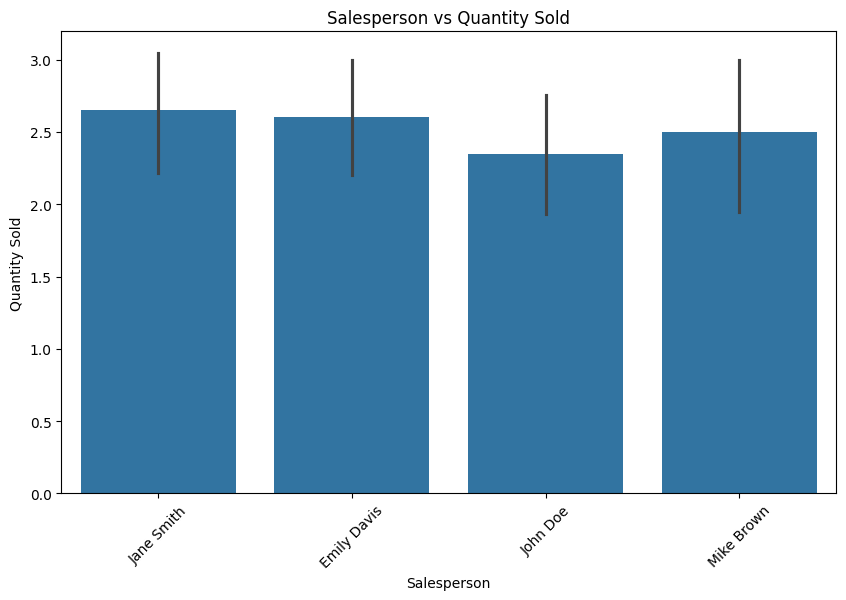

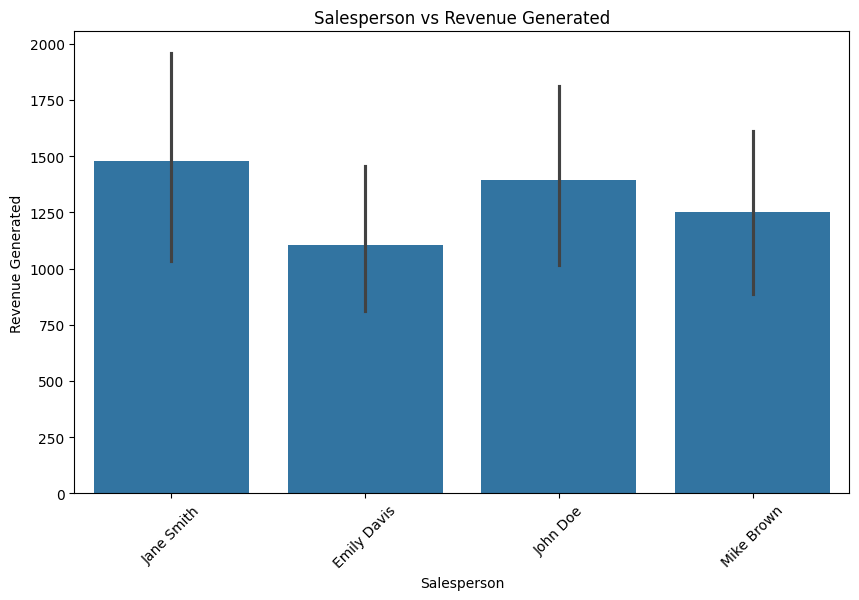

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Country vs Quantity Sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Quantity Sold', data=df)
plt.title('Region vs Quantity Sold')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Country vs Revenue Generated
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Price', data=df)
plt.title('Region vs Revenue Generated')
plt.xlabel('Region')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.show()

# Country vs Salesman
plt.figure(figsize=(10, 6))
country_salesman = df.groupby('Region')['Salesperson'].nunique().reset_index()
sns.barplot(x='Region', y='Salesperson', data=country_salesman)
plt.title('Region vs Number of Salesmen')
plt.xlabel('Region')
plt.ylabel('Number of Salesmen')
plt.xticks(rotation=45)
plt.show()


# Salesman vs Quantity Sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Salesperson', y='Quantity Sold', data=df)
plt.title('Salesperson vs Quantity Sold')
plt.xlabel('Salesperson')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Salesman vs Revenue Generated
plt.figure(figsize=(10, 6))
sns.barplot(x='Salesperson', y='Total Price', data=df)
plt.title('Salesperson vs Revenue Generated')
plt.xlabel('Salesperson')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.show()


Current Sales: Region
East     36504.44
North    38960.70
South    30357.52
West     24214.35
Name: Total Price, dtype: float64
Predicted Sales for Next Year:
Region
East     38329.6620
North    40908.7350
South    31875.3960
West     25425.0675
Name: Total Price, dtype: float64


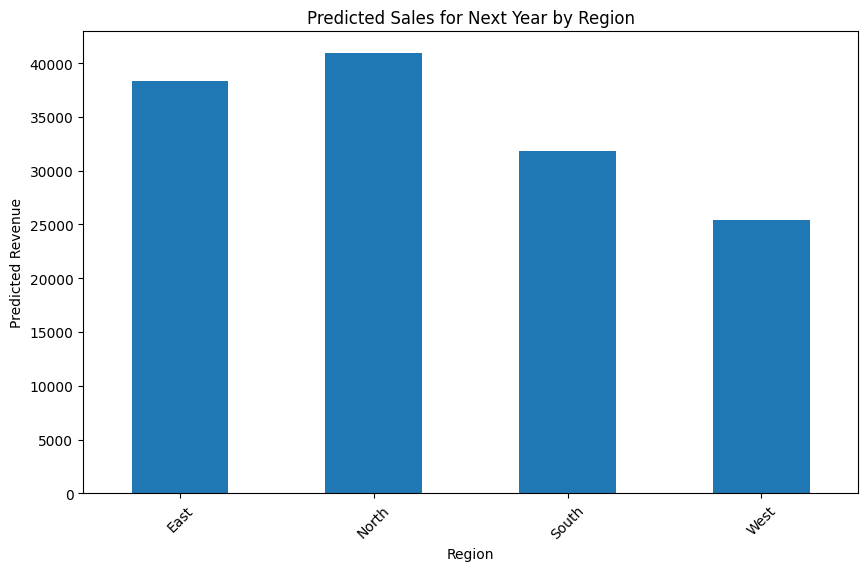

In [ ]:
region_sales = df.groupby('Region')['Total Price'].sum()
growth_rate = 0.05

next_year_sales = region_sales * (1 + growth_rate)
print("Current Sales:",region_sales)
print("Predicted Sales for Next Year:")
print(next_year_sales)

plt.figure(figsize=(10, 6))
next_year_sales.plot(kind='bar')
plt.title('Predicted Sales for Next Year by Region')
plt.xlabel('Region')
plt.ylabel('Predicted Revenue')
plt.xticks(rotation=45)
plt.show()
